# Exploratory Data Analysis (EDA) of the Steam Store Games dataset
 ## Data consists of steam store games and their attributes
 ### Dataset was obtained from Kaggle (https://www.kaggle.com/nikdavis/steam-store-games)

#### Dataset includes over 27,000 games, the primary goal is to explore the dataset and identify any trends or patterns that may be present in the data . By doing so, we can gain a better understanding of the dataset and potentially identify any interesting insights which can be used for further analysis.

## PART 1 steam.csv - Dataset containing information about the games

## Importing necessary libraries

In [79]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization on top of matplotlib

### Loading the dataset

In [80]:
df = pd.read_csv('Data/SteamData/steam.csv')
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [81]:
df.shape

(27075, 18)

As we can see , the dataset contains 27,075 rows and 18 columns , which is a good amount of data to work with.

In [82]:
df.dtypes # Checking the data types of the columns

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

In [83]:
df.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

Further we can see that the dataset contains some missing values in collumns developer and publusher, which we will deal with later, but for the further analysis we need to dislay the exact null values.

In [84]:
# checking the exact null values

df[df['developer'].isnull()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
23071,881910,The Battle Of Ages,2018-09-07,1,NaN,NaN,windows,0,Multi-player;Online Multi-Player,Action;Indie;Massively Multiplayer;RPG;Early A...,Early Access;Action;Massively Multiplayer,0,2,1,0,0,0-20000,3.99


In [85]:

df[df['publisher'].isnull()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
3420,307170,Borealis,2014-09-02,1,Conrad Nelson,NaN,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Casual;Indie,Casual;Indie;Action,17,301,192,132,146,50000-100000,3.99
4511,341120,Glorkian Warrior: The Trials Of Glork,2015-03-24,1,Pixeljam,NaN,windows;mac,0,Single-player;Steam Achievements;Full controll...,Indie,Indie;Platformer;Shoot 'Em Up,18,234,26,274,274,20000-50000,2.79
5229,359370,Pirate's Life,2015-04-17,1,Team Eyepatch,NaN,windows,0,Single-player,Simulation;Strategy,Strategy;Simulation;Pirates,0,25,41,0,0,0-20000,3.99
7464,422940,Divergence: Online,2016-01-06,1,Stained Glass Llama,NaN,windows,0,Multi-player;MMO;Steam Turn Notifications,Action;Indie;Massively Multiplayer;RPG;Early A...,Early Access;Massively Multiplayer;Indie,0,72,51,0,0,0-20000,14.99
7911,436240,Melancholy Republic,2018-04-12,1,Cloud Runner Studios,NaN,windows,0,Single-player,Adventure;Casual;Indie,Adventure;Indie;Casual,0,14,6,0,0,0-20000,6.99
9894,498710,After Dreams,2018-05-06,1,Matt Boyer,NaN,windows,0,Single-player,Violent;Adventure;Casual;Free to Play;Indie;Si...,Free to Play;Adventure;Indie,0,126,47,1,1,20000-50000,0.00
10011,502150,Interstellar Logistics Inc,2016-08-15,1,Exalted Guy Interactive,NaN,windows,0,Single-player,Casual,Casual;Puzzle;Sci-fi,9,25,4,281,281,0-20000,2.09
10564,516430,Ruin of the Reckless,2017-04-26,1,Faux-Operative Games,NaN,windows,0,Single-player;Co-op;Local Co-op;Shared/Split S...,Action;Adventure;Indie;RPG,Action;Indie;Adventure,0,63,11,0,0,0-20000,6.99
11123,531240,Max Stern,2016-10-21,1,Lupan Artiom Oleg,NaN,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;Indie,Action;Indie;Adventure,10,17,13,266,266,0-20000,3.99
13901,610740,SuperCluster: Void,2017-05-15,1,Logan McClure,NaN,windows,0,Single-player,Adventure;Indie;RPG,Adventure;RPG;Indie,0,16,4,0,0,0-20000,3.99


## Data Cleaning
We will start by cleaning the data, which includes handling missing values, removing duplicates, and dropping unnecessary columns.

In [86]:
# Dropping the missing values
df.dropna(subset=['developer','publisher'],inplace=True)

In [87]:
df.isnull().sum() # Checking if the missing values have been removed

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [88]:
df.nunique() # Checking the unique values in each column

appid               27061
name                27019
release_date         2619
english                 2
developer           17102
publisher           14353
platforms               7
required_age            6
categories           3331
genres               1551
steamspy_tags        6420
achievements          410
positive_ratings     2800
negative_ratings     1492
average_playtime     1345
median_playtime      1312
owners                 13
price                 282
dtype: int64

We can see that most of the columns have a large number of unique values, which is expected as the dataset contains information about over 27,000 games , but some of the columns have the similar values , such as required_age and platforms.


In [89]:
df.describe() # Statistical information about the dataset
# Takes only numerical columns into consideration

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.706100e+04,27061.000000,27061.000000,27061.000000,2.706100e+04,27061.000000,27061.000000,27061.000000,27061.000000
mean,5.962192e+05,0.981117,0.355087,45.270278,1.001042e+03,211.120579,149.847197,146.095821,6.079350
std,2.509174e+05,0.136115,2.406653,352.760212,1.899362e+04,4286.044728,1827.507970,2354.486857,7.876308
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.012100e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000
50%,5.990900e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000
75%,7.987900e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,421.990000


In [90]:
df['required_age'].value_counts() # Value counts of the required age

required_age
0     26465
18      308
16      192
12       73
7        12
3        11
Name: count, dtype: int64

In [91]:
import duckdb

In [92]:
%%sql
SELECT required_age FROM df GROUP BY required_age

,required_age
0,12
1,3
2,0
3,16
4,18
5,7


In [93]:
df['platforms'] = df['platforms'].str.split(';') # Splitting the platforms column

In [94]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,[windows],0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,[windows],0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,[windows],0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,"[windows, mac]",0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [95]:
platforms = df['platforms'].explode().value_counts()
platforms

platforms
windows    27056
mac         8064
linux       5233
Name: count, dtype: int64

As we can see , most of the games are available on Windows platform , followed by Mac and Linux.

In [96]:
# Dropping the games released in 2019 , so it doesn't affect the analysis
df = df[df['release_date'].str.contains('2019') == False]

In [97]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26046,999750,BLASTER LiLO,2018-12-28,1,Fabio Cardini,Fabio Cardini,[windows],0,Single-player;Online Multi-Player;Steam Achiev...,Action,Action;Shoot 'Em Up;Multiplayer,14,1,0,0,0,0-20000,1.99
26047,999760,Mobile Wars X,2018-12-28,1,NAPE GAMES,NAPE GAMES,[windows],0,Single-player,Action;Casual;Free to Play;Indie,Free to Play;Action;Indie,0,16,6,0,0,0-20000,0.00
26074,1001490,Tower Behind the Moon,2018-12-20,1,Choice of Games,Choice of Games,"[windows, mac, linux]",0,Single-player;Steam Achievements;Steam Cloud,Adventure;Indie;RPG,Adventure;RPG;Indie,35,6,4,0,0,0-20000,5.19
26082,1001880,aMAZE Valentine,2018-12-28,1,Blender Games,Blender Games,[windows],0,Single-player;Steam Achievements,Casual;Indie,Casual;Indie;Puzzle,100,13,2,0,0,0-20000,0.79


In [98]:
# Creating a new column named player_base , which only takes the lower bound of the owners column, so the data is more readable
df['player_base'] = df['owners'].str.split('-').str[0]

/var/folders/5b/p0hg1d1936v4cg2r15clzzq40000gn/T/ipykernel_85874/402116625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_base'] = df['owners'].str.split('-').str[0]


In [99]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,player_base
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,10000000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5000000
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,5000000
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,"[windows, mac, linux]",0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,5000000
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26046,999750,BLASTER LiLO,2018-12-28,1,Fabio Cardini,Fabio Cardini,[windows],0,Single-player;Online Multi-Player;Steam Achiev...,Action,Action;Shoot 'Em Up;Multiplayer,14,1,0,0,0,0-20000,1.99,0
26047,999760,Mobile Wars X,2018-12-28,1,NAPE GAMES,NAPE GAMES,[windows],0,Single-player,Action;Casual;Free to Play;Indie,Free to Play;Action;Indie,0,16,6,0,0,0-20000,0.00,0
26074,1001490,Tower Behind the Moon,2018-12-20,1,Choice of Games,Choice of Games,"[windows, mac, linux]",0,Single-player;Steam Achievements;Steam Cloud,Adventure;Indie;RPG,Adventure;RPG;Indie,35,6,4,0,0,0-20000,5.19,0
26082,1001880,aMAZE Valentine,2018-12-28,1,Blender Games,Blender Games,[windows],0,Single-player;Steam Achievements,Casual;Indie,Casual;Indie;Puzzle,100,13,2,0,0,0-20000,0.79,0


In [100]:
df['categories']

0        Multi-player;Online Multi-Player;Local Multi-P...
1        Multi-player;Online Multi-Player;Local Multi-P...
2                    Multi-player;Valve Anti-Cheat enabled
3        Multi-player;Online Multi-Player;Local Multi-P...
4        Single-player;Multi-player;Valve Anti-Cheat en...
                               ...                        
26046    Single-player;Online Multi-Player;Steam Achiev...
26047                                        Single-player
26074         Single-player;Steam Achievements;Steam Cloud
26082                     Single-player;Steam Achievements
26097    Single-player;Steam Achievements;Steam Leaderb...
Name: categories, Length: 24848, dtype: object

In [101]:
# splitting columns with multiple values into lists
df['categories'] = df['categories'].str.split(';')
df['steamspy_tags'] = df['steamspy_tags'].str.split(';')

/var/folders/5b/p0hg1d1936v4cg2r15clzzq40000gn/T/ipykernel_85874/2751957953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'] = df['categories'].str.split(';')
/var/folders/5b/p0hg1d1936v4cg2r15clzzq40000gn/T/ipykernel_85874/2751957953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['steamspy_tags'] = df['steamspy_tags'].str.split(';')


In [102]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,player_base
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,10000000-20000000,7.19,10000000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,3318,633,277,62,5000000-10000000,3.99,5000000
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",Action,"[FPS, World War II, Multiplayer]",0,3416,398,187,34,5000000-10000000,3.99,5000000
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,1273,267,258,184,5000000-10000000,3.99,5000000
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",Action,"[FPS, Action, Sci-fi]",0,5250,288,624,415,5000000-10000000,3.99,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26046,999750,BLASTER LiLO,2018-12-28,1,Fabio Cardini,Fabio Cardini,[windows],0,"[Single-player, Online Multi-Player, Steam Ach...",Action,"[Action, Shoot 'Em Up, Multiplayer]",14,1,0,0,0,0-20000,1.99,0
26047,999760,Mobile Wars X,2018-12-28,1,NAPE GAMES,NAPE GAMES,[windows],0,[Single-player],Action;Casual;Free to Play;Indie,"[Free to Play, Action, Indie]",0,16,6,0,0,0-20000,0.00,0
26074,1001490,Tower Behind the Moon,2018-12-20,1,Choice of Games,Choice of Games,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Steam Cloud]",Adventure;Indie;RPG,"[Adventure, RPG, Indie]",35,6,4,0,0,0-20000,5.19,0
26082,1001880,aMAZE Valentine,2018-12-28,1,Blender Games,Blender Games,[windows],0,"[Single-player, Steam Achievements]",Casual;Indie,"[Casual, Indie, Puzzle]",100,13,2,0,0,0-20000,0.79,0


In [103]:
release_year = df['release_date'].str.split('-').str[0]
df['release_year'] = release_year
# change the data type to int
df['release_year'] = df['release_year'].astype(int)
games_per_year = df['release_year'].value_counts().sort_index()

/var/folders/5b/p0hg1d1936v4cg2r15clzzq40000gn/T/ipykernel_85874/3079147474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = release_year
/var/folders/5b/p0hg1d1936v4cg2r15clzzq40000gn/T/ipykernel_85874/3079147474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_year'].astype(int)


/var/folders/5b/p0hg1d1936v4cg2r15clzzq40000gn/T/ipykernel_85874/1483922091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis')


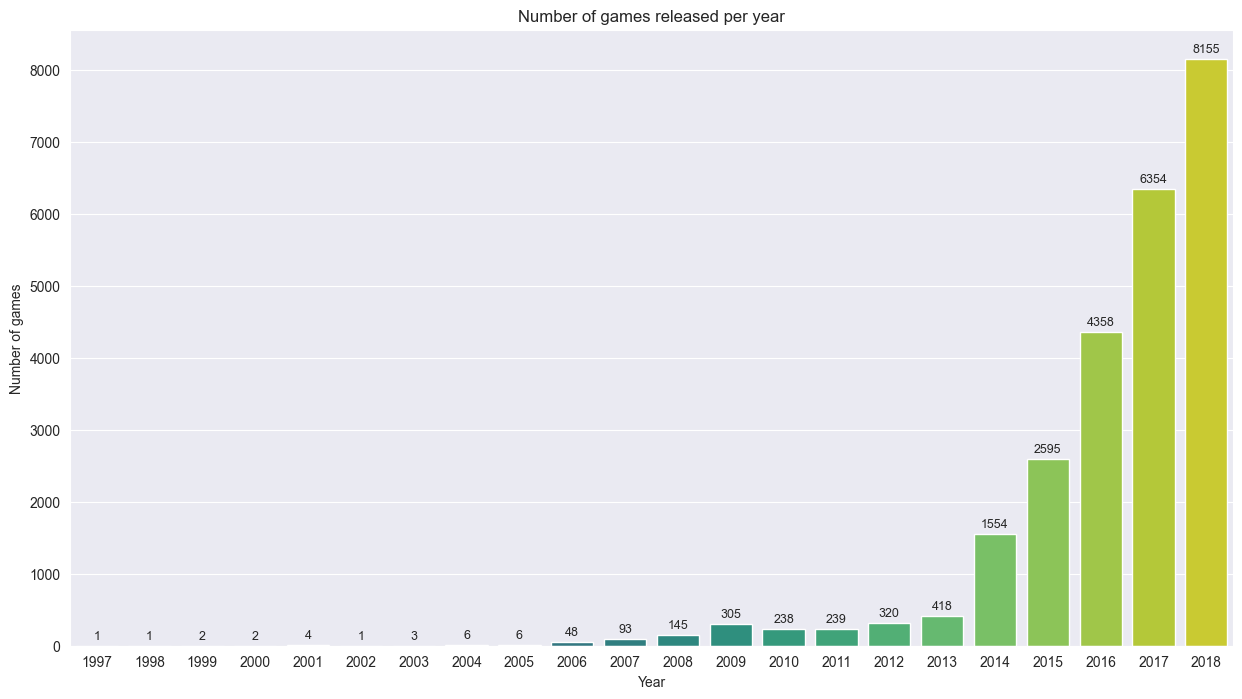

In [104]:

plt.figure(figsize=(15,8))


ax = sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis')
for i, v in enumerate(games_per_year.values):
    ax.text(i, v+50, str(v), ha='center', va='bottom', fontsize=9)
plt.title('Number of games released per year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

#### The number of games released per year has been increasing over the years exponentially , with the highest number of games released in 2018 , as long as we wont take into consideration the games released in 2019.

In [107]:
# check for the oldest game in the dataset
df[df['release_date'] == df['release_date'].min()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,player_base,release_year
2685,282010,Carmageddon Max Pack,1997-06-30,1,Stainless Games Ltd,THQ Nordic,[windows],0,"[Single-player, Multi-player, Steam Trading Ca...",Action;Indie;Racing,"[Racing, Action, Classic]",0,352,35,13,13,50000-100000,5.99,50000,1997


In [106]:
# show all the half-life games
df[df['name'].str.contains('Half-Life')]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,player_base,release_year
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",Action,"[FPS, Action, Sci-fi]",0,5250,288,624,415,5000000-10000000,3.99,5000000,1999
6,70,Half-Life,1998-11-08,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Online Multi-Pla...",Action,"[FPS, Classic, Action]",0,27755,1100,1300,83,5000000-10000000,7.19,5000000,1998
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,[Single-player],Action,"[FPS, Action, Sci-fi]",0,3822,420,361,205,5000000-10000000,3.99,5000000,2001
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Steam Trad...",Action,"[FPS, Action, Sci-fi]",33,67902,2419,691,402,10000000-20000000,7.19,10000000,2004
11,280,Half-Life: Source,2004-06-01,1,Valve,Valve,"[windows, mac, linux]",0,[Single-player],Action,"[FPS, Action, Sci-fi]",0,3767,1053,190,214,2000000-5000000,0.00,2000000,2004
13,320,Half-Life 2: Deathmatch,2004-11-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled, Inclu...",Action,"[Action, FPS, Multiplayer]",0,6020,787,311,32,10000000-20000000,3.99,10000000,2004
14,340,Half-Life 2: Lost Coast,2005-10-27,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Commentary available]",Action,"[FPS, Action, Singleplayer]",0,5783,1020,46,29,10000000-20000000,0.00,10000000,2005
15,360,Half-Life Deathmatch: Source,2006-05-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",Action,"[Action, FPS, Multiplayer]",0,1362,473,102,81,5000000-10000000,0.00,5000000,2006
16,380,Half-Life 2: Episode One,2006-06-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Captions a...",Action,"[FPS, Action, Sci-fi]",13,7908,517,281,184,5000000-10000000,5.79,5000000,2006
18,420,Half-Life 2: Episode Two,2007-10-10,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Captions a...",Action,"[FPS, Action, Sci-fi]",22,13902,696,354,301,5000000-10000000,5.79,5000000,2007


In [108]:
%%sql
SELECT * FROM df WHERE name LIKE '%Half-Life%' ORDER BY release_date

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,player_base,release_year
0,70,Half-Life,1998-11-08,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Online Multi-Pla...",Action,"[FPS, Classic, Action]",0,27755,1100,1300,83,5000000-10000000,7.19,5000000,1998
1,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",Action,"[FPS, Action, Sci-fi]",0,5250,288,624,415,5000000-10000000,3.99,5000000,1999
2,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,[Single-player],Action,"[FPS, Action, Sci-fi]",0,3822,420,361,205,5000000-10000000,3.99,5000000,2001
3,280,Half-Life: Source,2004-06-01,1,Valve,Valve,"[windows, mac, linux]",0,[Single-player],Action,"[FPS, Action, Sci-fi]",0,3767,1053,190,214,2000000-5000000,0.00,2000000,2004
4,320,Half-Life 2: Deathmatch,2004-11-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled, Inclu...",Action,"[Action, FPS, Multiplayer]",0,6020,787,311,32,10000000-20000000,3.99,10000000,2004
5,220,Half-Life 2,2004-11-16,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Steam Trad...",Action,"[FPS, Action, Sci-fi]",33,67902,2419,691,402,10000000-20000000,7.19,10000000,2004
6,340,Half-Life 2: Lost Coast,2005-10-27,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Commentary available]",Action,"[FPS, Action, Singleplayer]",0,5783,1020,46,29,10000000-20000000,0.00,10000000,2005
7,360,Half-Life Deathmatch: Source,2006-05-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",Action,"[Action, FPS, Multiplayer]",0,1362,473,102,81,5000000-10000000,0.00,5000000,2006
8,380,Half-Life 2: Episode One,2006-06-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Captions a...",Action,"[FPS, Action, Sci-fi]",13,7908,517,281,184,5000000-10000000,5.79,5000000,2006
9,420,Half-Life 2: Episode Two,2007-10-10,1,Valve,Valve,"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Captions a...",Action,"[FPS, Action, Sci-fi]",22,13902,696,354,301,5000000-10000000,5.79,5000000,2007


##### Valve's Half-Life series is one of the most popular game series in the world, with the first game being released in 1998 and the last game being released in 2007. The series has a huge fan base and has been critically acclaimed for its story, gameplay, and graphics. In the year 2005, Valve started published partnership with other companies , not only by Valve itself. This lead to increase in the number of games released in the year 2005 and so on.